In [1]:
from scipy.io.wavfile import read

In [95]:
import numpy as np

In [123]:
call = read('/home/hunaid/Downloads/StudyProject_DataSample_updated/StudyProject_DataSample/preproccessed_2s/call-chimp-bieMbeli-phsm_00000_2012_0910_3000_5000.wav')
callgroup = read('/home/hunaid/Downloads/StudyProject_DataSample_updated/StudyProject_DataSample/preproccessed_2s/call-chimp-bie-phwithgroup-trimmed_00000_2012_0914_21000_23000.wav')
noise = read('/home/hunaid/Downloads/StudyProject_DataSample_updated/StudyProject_DataSample/preproccessed_2s/noise_00000_2012_1388_2000_4000.wav')

In [14]:
import matplotlib.pyplot as plt

In [42]:
? plt.plot

alpha is the transparency <br />
stp is the step size. For simplicity, we plot every 50th value

In [235]:
alph = .3
stp = 50

### Scatter Plot of Raw Data

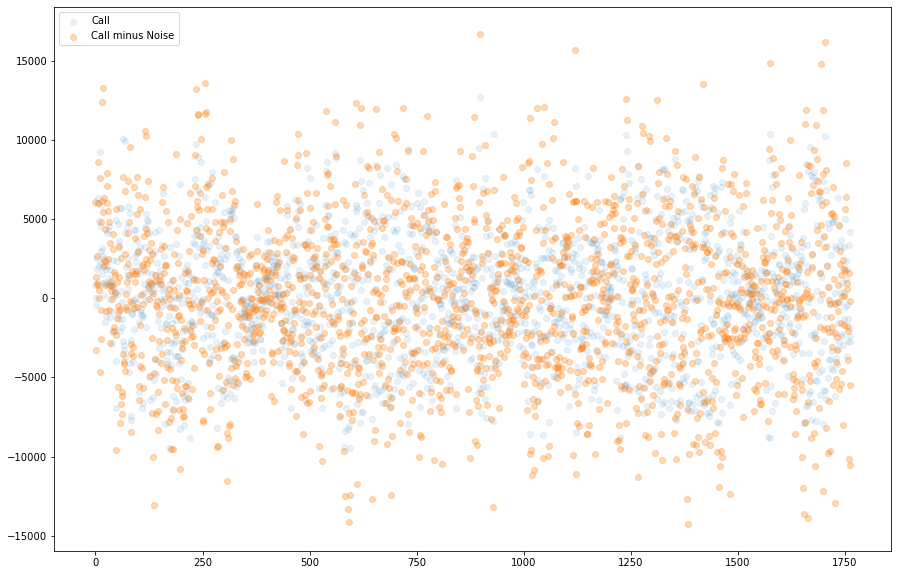

In [237]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# call single
ax.scatter(range(len(call[1][::stp])), call[1][::stp], alpha=alph-.2, label="Call")

# call group
#ax.scatter(range(len(callgroup[1][::stp])), callgroup[1][::stp], alpha=alph)

# noise
# ax.scatter(range(len(noise[1][::stp])), noise[1][::stp], alpha=alph-.2, label="Noise")

# call minus noise
ax.scatter(range(len((call[1] - noise[1])[::stp])), (call[1] - noise[1])[::stp], alpha=alph, label="Call minus Noise")

plt.legend()

### Histogram

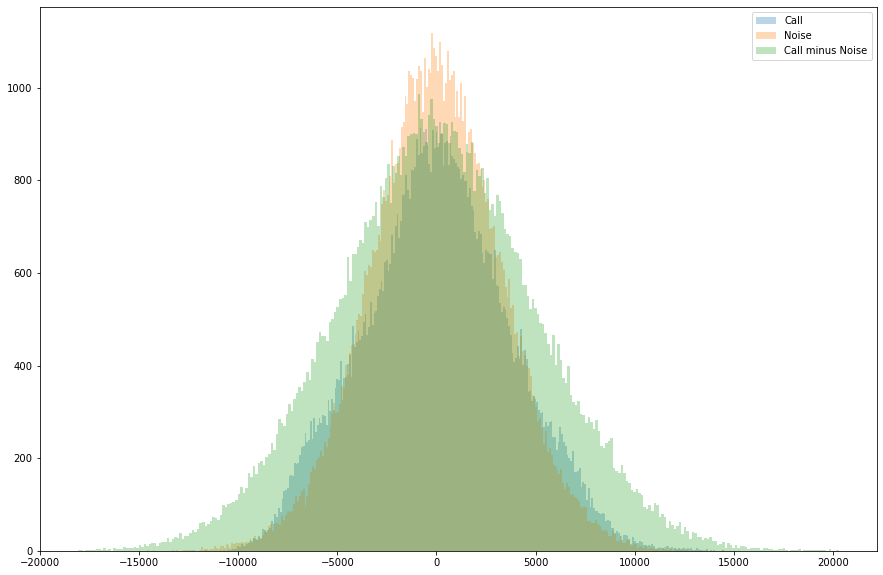

In [243]:
fig2, ax2 = plt.subplots(1, 1, figsize=(15, 10))

# call single
ax2.hist(call[1], bins=300, alpha=alph, label="Call");

# call group
# ax2.hist(callgroup[1], bins=100, alpha=alph, label="Call Group");

# noise
ax2.hist(noise[1], bins=300, alpha=alph, label="Noise");

# call minus noise
ax2.hist(call[1] - noise[1], bins=300, alpha=alph, label="Call minus Noise");

# absolute call minus absolute noise
# ax2.hist(np.abs(call[1]) - np.abs(noise[1]), bins=100, alpha=alph, label="Absolute Call minus Absolute Noise");

# absolute call minus absolute noise
# ax2.hist(np.abs(call[1] - noise[1]), bins=100, alpha=alph, label="Absolute Value of Call minus Noise");

# square call minus square noise
# ax2.hist(np.square(call[1]) - np.square(noise[1]), bins=100, alpha=alph, label="Square Call minus Square Noise");

ax2.legend()

### Scatter Plot of Absolute Values

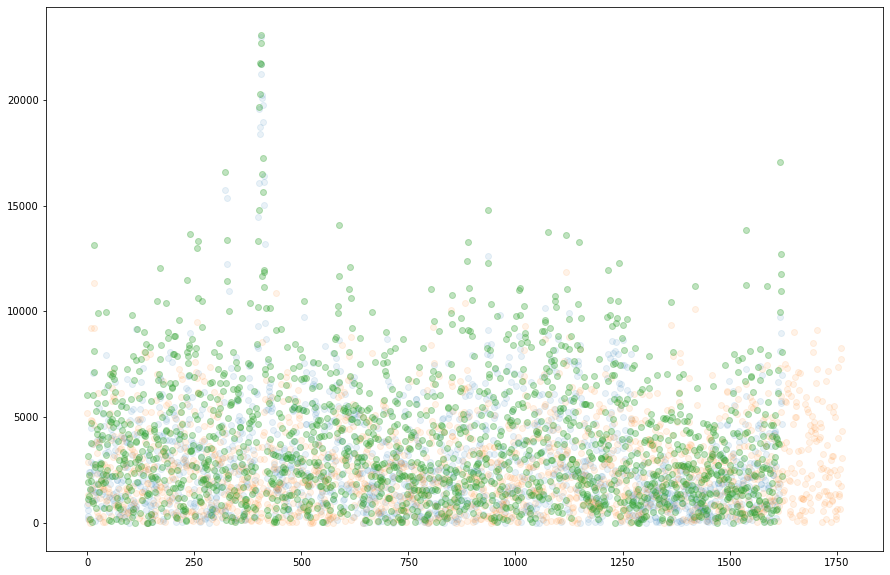

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# call single
ax.scatter(range(len(call[1][::stp])), np.abs(call[1][::stp]), alpha=alph-.2)

# call group
#ax.scatter(range(len(callgroup[1][::stp])), callgroup[1][::stp], alpha=alph)

# noise
ax.scatter(range(len(noise[1][::stp])), np.abs(noise[1][::stp]), alpha=alph-.2)

# call minus noise
ax.scatter(range(len((call[1] - noise[1][:81188])[::stp])), np.abs(call[1] - noise[1][:81188])[::stp], alpha=alph)


In [162]:
np.std(call[1]), np.std(callgroup[1]), np.std(noise[1])

(3723.565095293048, 4032.9403919689357, 3325.671490431382)

In [126]:
np.mean(call[1]), np.mean(callgroup[1]), np.mean(noise[1])

(47.33675736961451, -3.6519805882642755, -7.162845804988662)

In [127]:
np.median(call[1]), np.median(callgroup[1]), np.median(noise[1])

(26.0, -178.0, -25.0)

In [150]:
from scipy.stats import describe

In [152]:
describe(call[1]), describe(callgroup[1]), describe(noise[1])

(DescribeResult(nobs=88200, minmax=(-12287, 14514), mean=47.33675736961451, variance=13865094.21949946, skewness=0.08594976784682105, kurtosis=-0.2009980598810177),
 DescribeResult(nobs=81188, minmax=(-11609, 24188), mean=-3.6519805882642755, variance=16264808.540304625, skewness=1.0347451654137143, kurtosis=3.888702428979549),
 DescribeResult(nobs=88200, minmax=(-14621, 14507), mean=-7.162845804988662, variance=11060216.26154543, skewness=0.004547428236869244, kurtosis=0.15444545662048492))

In [185]:
np.ma.average(call[1], 4)

IndexError: tuple index out of range

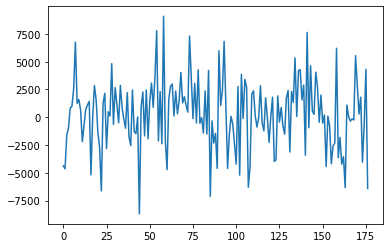

In [183]:
plt.plot((np.abs(call[1]) - np.abs(noise[1]))[::500])

In [191]:
def moving_average(a, n=100) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [190]:
call[1].shape

(88200,)

In [224]:
ma = 10000

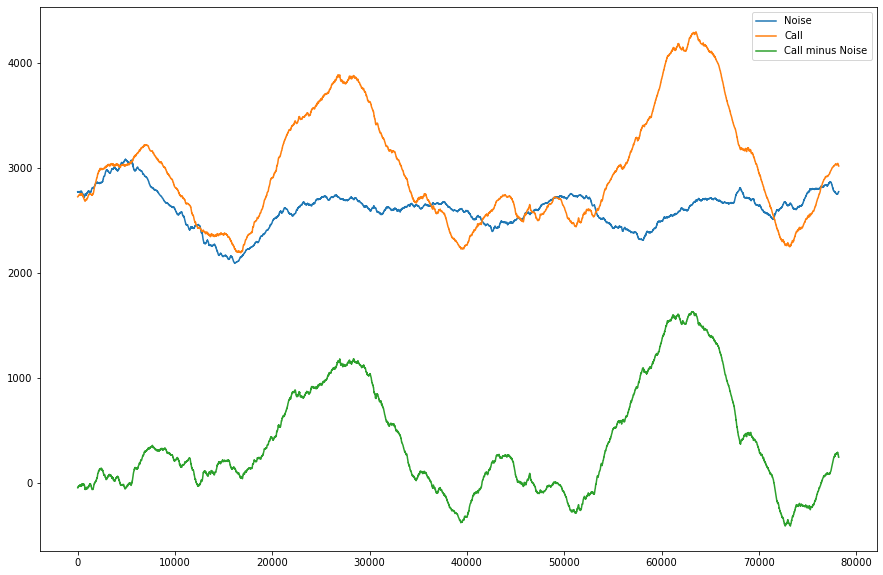

In [225]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.plot(moving_average(np.abs(noise[1]), ma), label="Noise")
ax.plot(moving_average(np.abs(call[1]), ma), label="Call")
ax.plot(moving_average(np.abs(call[1]), ma) - moving_average(np.abs(noise[1]), ma), label="Call minus Noise")

plt.legend()

In [211]:
from scipy.io.wavfile import write

In [244]:
write('minusnoise-ma.wav', 44100, moving_average(np.abs(call[1]), ma) - moving_average(np.abs(noise[1]), ma))

In [218]:
write('minusnoise-abs.wav', 44100, np.abs(call[1]) - np.abs(noise[1]))

In [220]:
write('minusnoise-vanilla.wav', 44100, call[1] - noise[1])

In [226]:
write('call-5kma.wav', 44100, moving_average(call[1], ma))